<a href="https://colab.research.google.com/github/sinku29/Data-Science-Assignment/blob/main/Delivery_time_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
data = pd.read_csv("delivery_time.csv")
data = data.rename(columns={'Delivery Time': 'Delivery_Time', 'Sorting Time': 'Sorting_Time'})
print(data)

    Delivery_Time  Sorting_Time
0           21.00            10
1           13.50             4
2           19.75             6
3           24.00             9
4           29.00            10
5           15.35             6
6           19.00             7
7            9.50             3
8           17.90            10
9           18.75             9
10          19.83             8
11          10.75             4
12          16.68             7
13          11.50             3
14          12.03             3
15          14.88             4
16          13.75             6
17          18.11             7
18           8.00             2
19          17.83             7
20          21.50             5


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


,Delivery_Time,Sorting_Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


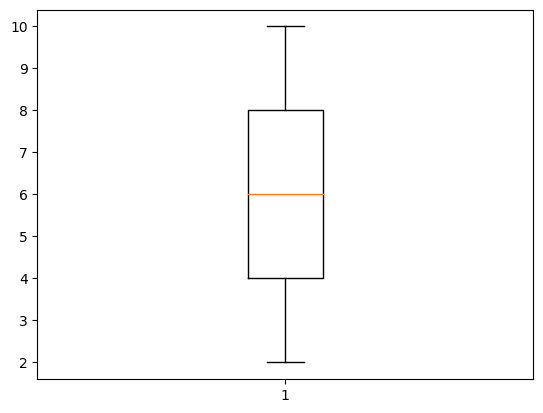

In [70]:
plt.boxplot(data["Sorting_Time"])
data.describe()

(array([1., 3., 3., 1., 0., 3., 4., 1., 2., 3.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <BarContainer object of 10 artists>)

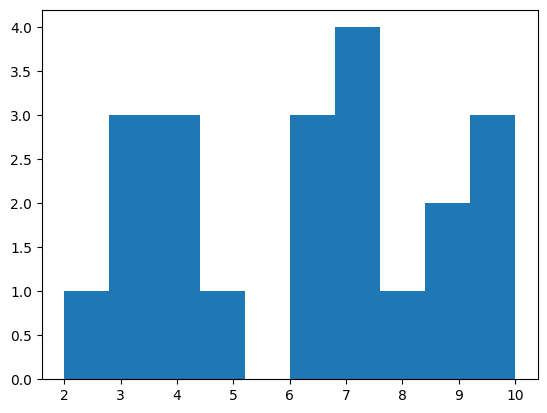

In [71]:
plt.hist(data["Sorting_Time"])

In [72]:
data.describe()

,Delivery_Time,Sorting_Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [73]:
data.isnull().sum()

Delivery_Time    0
Sorting_Time     0
dtype: int64

Text(0.5, 1.0, 'Scatterplot Delivery Time vs Sorting Time')

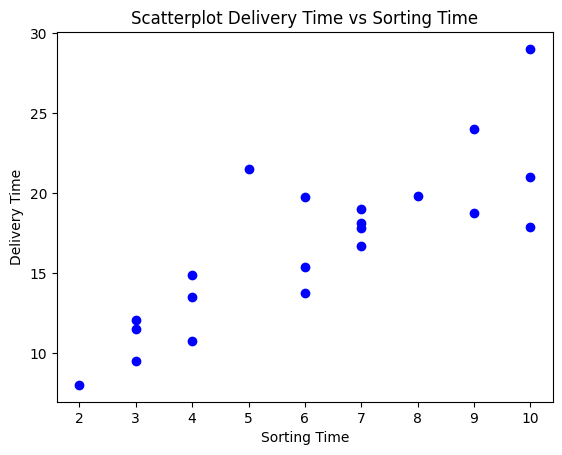

In [75]:
#Scatterplots
plt.plot(data['Sorting_Time'], data['Delivery_Time'], 'bo')
plt.xlabel("Sorting Time")
plt.ylabel("Delivery Time")
plt.title('Scatterplot Delivery Time vs Sorting Time')

<Axes: xlabel='Sorting_Time', ylabel='Density'>

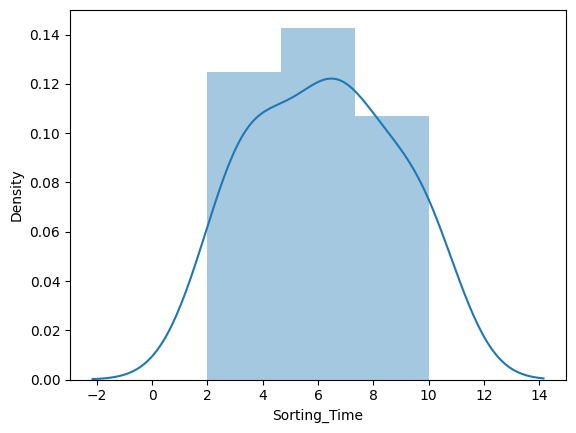

In [76]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.distplot(data['Sorting_Time'])

<Axes: xlabel='Delivery_Time', ylabel='Density'>

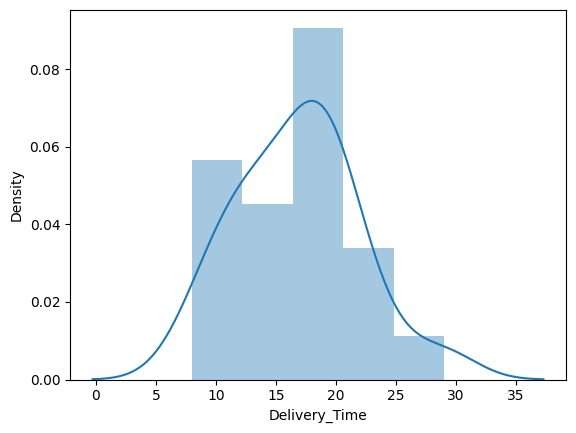

In [77]:
sns.distplot(data['Delivery_Time'])

<Axes: xlabel='Sorting_Time', ylabel='Delivery_Time'>

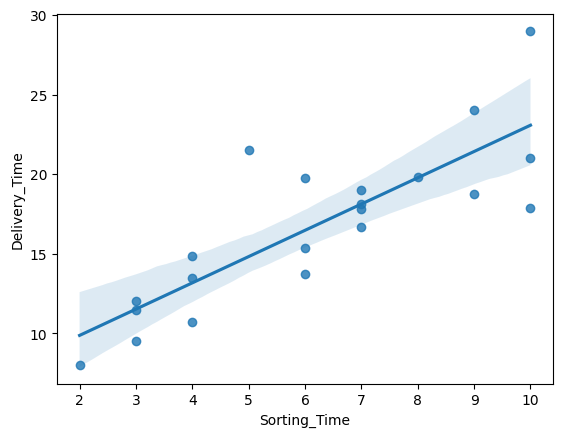

In [79]:
sns.regplot(x="Sorting_Time", y="Delivery_Time", data=data)

# Correlation

In [80]:
data.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


Fitting a Linear Regression Model

In [81]:
#data = data.rename(columns={'Delivery Time': 'Delivery_Time', 'Sorting Time': 'Sorting_Time'})
import statsmodels.formula.api as smf
model = smf.ols('Delivery_Time ~ Sorting_Time',data = data).fit()

In [82]:
model.summary()
#model.resid
#model.resid_pearson

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sun, 18 Feb 2024   Prob (F-statistic):           3.98e-06
Time:                        16:40:38   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
pred = model.predict(data.iloc[:,1])
pred

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [ ]:
pred = model.predict(data.iloc[:,0])
pred
#pd.set_option("display.max_rows", 21)
pred
#rmse_lin = np.sqrt(np.mean((np.array(data['Delivery Time'])-np.array(pred3))**2))
#rmse_lin

In [ ]:
#Coefficients
model.params

In [ ]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

In [ ]:
#R squared values
(model.rsquared,model.rsquared_adj)

In [ ]:
model.resid
model.resid_pearson

# Predict for new data point

In [85]:
#Predict for sortingtime 2.5,5,7.5,10
newdata=pd.Series([2.5,5,7.5,10])

In [86]:
data_pred=pd.DataFrame(newdata,columns=['Sorting_Time'])

In [87]:
model.predict(data_pred)

0    10.705284
1    14.827833
2    18.950383
3    23.072933
dtype: float64